## Importing Necessary Libraries

In [926]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from math import sqrt
%matplotlib inline

# To Display all the columns even if there are huge number of columns
pd.pandas.set_option('display.max_columns',None)

# Model Building
from sklearn.linear_model import LinearRegression  # Import Linear Regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# !pip install xgboost
#from xgboost import XGBRegressor

from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error

## Importing Training nd Testing Dataset

In [791]:
df_train=pd.read_csv('price_train.csv')
df_test=pd.read_csv('price_test.csv')

## Viewing the data

In [792]:
df_train

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,5550,22208755,False,99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.610532,-122.342332,4,1.0,2,2,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,G...",$129.00,2,1125,True,strict,$350.00
3462,7391,28049926,False,100%,within an hour,123,False,1,Capitol Hill,House,Shared room,47.642069,-122.304120,1,1.0,1,1,Real Bed,"{Wifi,Kitchen,Heating,Essentials,Shampoo,Hange...",$15.00,1,21,True,strict_14_with_grace_period,$30.00
3463,6056,23567364,True,100%,within an hour,4,False,2,Other neighborhoods,House,Private room,47.716853,-122.353945,1,2.0,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",""Pets...",$22.00,2,30,True,flexible,$30.00
3464,1277,6728419,True,100%,within a few hours,1,False,2,Other neighborhoods,Guest suite,Entire home/apt,47.672343,-122.283291,1,1.0,1,1,Real Bed,"{TV,Wifi,""Free parking on premises"",""Indoor fi...",$25.00,1,1125,False,flexible,$95.00


In [793]:
df_test

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy
0,130,392779,False,90%,within an hour,1,True,4,Beacon Hill,Guest suite,Entire home/apt,47.575769,-122.316362,2,1.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$85.00,3,300,True,moderate
1,2425,12456183,True,86%,within a day,1,False,4,Lake City,Guest suite,Entire home/apt,47.711951,-122.302355,1,1.0,1,2,Real Bed,"{TV,Wifi,""Free parking on premises"",""Pets allo...",$40.00,2,1125,True,moderate
2,432,1851863,True,100%,within an hour,1,True,2,Northgate,Apartment,Entire home/apt,47.697103,-122.344556,1,1.0,1,1,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Heati...",$150.00,5,120,False,strict_14_with_grace_period
3,5994,23309878,True,100%,within an hour,2,True,2,Downtown,Apartment,Entire home/apt,47.612364,-122.349425,1,1.0,1,1,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$75.00,1,30,False,strict_14_with_grace_period
4,2110,10768347,False,100%,within an hour,1,False,2,Other neighborhoods,House,Private room,47.687264,-122.313444,1,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,1,3,False,flexible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,4349,19350610,False,92%,within an hour,51,True,3,University District,Apartment,Entire home/apt,47.658539,-122.316761,1,1.0,1,1,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""P...",$60.00,2,1125,False,moderate
1730,1580,7886656,True,100%,within an hour,2,True,4,West Seattle,Apartment,Entire home/apt,47.559256,-122.384556,1,1.0,2,2,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",$50.00,2,29,True,moderate
1731,679,3535171,True,100%,within an hour,2,True,2,Other neighborhoods,House,Private room,47.687966,-122.352905,1,1.0,1,1,Real Bed,"{TV,Internet,Wifi,""Pets live on this property""...",$25.00,1,29,False,strict_14_with_grace_period
1732,7360,27930170,False,100%,within an hour,1,False,4,Central Area,Guest suite,Entire home/apt,47.615843,-122.299203,2,1.0,1,2,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",""Free...",$75.00,3,1125,True,strict_14_with_grace_period


In [794]:
print('The Train Data Shape is:',df_train.shape)
print('The Test Data Shape is:',df_test.shape)

The Train Data Shape is: (3466, 25)
The Test Data Shape is: (1734, 24)


In [795]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            3466 non-null   int64  
 1   id                            3466 non-null   int64  
 2   host_is_superhost             3466 non-null   bool   
 3   host_response_rate            3466 non-null   object 
 4   host_response_time            3466 non-null   object 
 5   host_listings_count           3466 non-null   int64  
 6   host_identity_verified        3466 non-null   bool   
 7   accommodates                  3466 non-null   int64  
 8   neighbourhood_group_cleansed  3466 non-null   object 
 9   property_type                 3466 non-null   object 
 10  room_type                     3466 non-null   object 
 11  latitude                      3466 non-null   float64
 12  longitude                     3466 non-null   float64
 13  gue

In [796]:
# No null values in the training dataset

In [797]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1                            1734 non-null   int64  
 1   id                            1734 non-null   int64  
 2   host_is_superhost             1734 non-null   bool   
 3   host_response_rate            1734 non-null   object 
 4   host_response_time            1734 non-null   object 
 5   host_listings_count           1734 non-null   int64  
 6   host_identity_verified        1734 non-null   bool   
 7   accommodates                  1734 non-null   int64  
 8   neighbourhood_group_cleansed  1734 non-null   object 
 9   property_type                 1734 non-null   object 
 10  room_type                     1734 non-null   object 
 11  latitude                      1734 non-null   float64
 12  longitude                     1734 non-null   float64
 13  gue

In [798]:
# No null values in the testing dataset

In [799]:
# changing the dtype of target feature for creating a base model with data

df_target=df_train.copy()
df_target.drop(['X1', 'id', 'host_is_superhost', 'host_response_rate',
       'host_response_time', 'host_listings_count', 'host_identity_verified',
       'accommodates', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'latitude', 'longitude', 'guests_included', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'instant_bookable',
       'cancellation_policy'],axis=1,inplace=True)
df_target['price']=df_target['price'].str.replace('$','')
df_target['price']=pd.to_numeric(df_target['price'],errors='coerce')

In [800]:
# after converting it into the data type float check for null values

df_target.isnull().sum()

price    39
dtype: int64

In [801]:
df_target.mean()

price    149.123723
dtype: float64

In [802]:
# fill na with mean inorder for the base model

df_target=df_target.fillna(df_target.mean())

In [803]:
df_target.isnull().sum()

price    0
dtype: int64

## Training The Base Model

In [804]:
# we train our base model by dropping all the categorical columns 

x=df_train.drop(['price','bed_type', 'amenities', 'cleaning_fee','neighbourhood_group_cleansed', 'property_type','room_type','host_response_rate',
       'host_response_time','cancellation_policy'],axis=1)
y=df_target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
model=regressor.fit(x_train,y_train)
model

model.score(x_train, y_train)*100
                    

44.828357176213196

In [805]:
# the score is very poor because it is a raw data
# we need to process the data

## Exploratory Data Analysis

In [806]:
# the target feature 'price' and 'cleaning fee' feature is in object data type, which will not be suitable for analysis
# need to convert it into float and to remove the dollar sign

# price

df_train['price']=df_train['price'].str.replace('$','')
df_train['price']=pd.to_numeric(df_train['price'],errors='coerce')

# cleaning_fee

df_train['cleaning_fee']=df_train['cleaning_fee'].str.replace('$','')
df_train['cleaning_fee']=pd.to_numeric(df_train['cleaning_fee'],errors='coerce')

df_test['cleaning_fee']=df_test['cleaning_fee'].str.replace('$','')
df_test['cleaning_fee']=pd.to_numeric(df_test['cleaning_fee'],errors='coerce')

In [807]:
# check for null values in price and cleaning fee feature

df_train[['price','cleaning_fee']].isnull().sum()

price           39
cleaning_fee     0
dtype: int64

In [808]:
df_test['cleaning_fee'].isnull().sum() # price column is not in test data

0

In [809]:
df_train['price'].skew()

3.416860174802076

In [810]:
# imputing null values in the price column with median because it has having outliers

df_train['price']=df_train['price'].fillna(df_train['price'].median())
df_train['price'].isnull().sum()

0

In [811]:
# the host_response rate is in percentage but the datatype is in object, so we need to remove that %
# since it is a % value divide it by 100

df_train['host_response_rate']=df_train['host_response_rate'].str.replace('%','').astype(float)/100
df_test['host_response_rate']=df_test['host_response_rate'].str.replace('%','').astype(float)/100

# Numerical Features

In [812]:
numerical_features_train=[feature for feature in df_train.columns if df_train[feature].dtypes != 'O' and df_train[feature].dtypes != 'bool' and feature!='price'  ]
numerical_features_test=[feature for feature in df_test.columns if df_train[feature].dtypes != 'O' and df_train[feature].dtypes != 'bool']

print('No Of Numerical Features In Training Data:',len(numerical_features_train))
print('No Of Numerical Features In Testing Data:',len(numerical_features_test))

No Of Numerical Features In Training Data: 14
No Of Numerical Features In Testing Data: 14


In [813]:
numerical_features_train

['X1',
 'id',
 'host_response_rate',
 'host_listings_count',
 'accommodates',
 'latitude',
 'longitude',
 'guests_included',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'minimum_nights',
 'maximum_nights']

In [814]:
numerical_features_test

['X1',
 'id',
 'host_response_rate',
 'host_listings_count',
 'accommodates',
 'latitude',
 'longitude',
 'guests_included',
 'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'minimum_nights',
 'maximum_nights']

In [815]:
df_train[numerical_features_train].nunique()

X1                     3466
id                     3466
host_response_rate       32
host_listings_count      61
accommodates             19
latitude               3465
longitude              3459
guests_included          16
bathrooms                12
bedrooms                  9
beds                     18
cleaning_fee            153
minimum_nights           28
maximum_nights           92
dtype: int64

In [816]:
df_test[numerical_features_test].nunique()

X1                     1734
id                     1734
host_response_rate       31
host_listings_count      57
accommodates             16
latitude               1734
longitude              1734
guests_included          12
bathrooms                 9
bedrooms                  7
beds                     13
cleaning_fee            124
minimum_nights           19
maximum_nights           73
dtype: int64

In [817]:
df_train[numerical_features_train]

,X1,id,host_response_rate,host_listings_count,accommodates,latitude,longitude,guests_included,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights
0,5460,22146017,0.99,521,5,47.612163,-122.338239,4,2.0,2,2,129.0,2,1125
1,4143,18638163,1.00,1,2,47.640827,-122.355248,1,1.0,0,1,50.0,2,30
2,5802,22734110,1.00,1,4,47.549007,-122.273951,2,1.0,1,2,25.0,2,28
3,776,3946674,0.90,1,2,47.601922,-122.307979,1,1.0,1,1,0.0,2,30
4,6064,23610186,1.00,4,8,47.552311,-122.293409,6,2.5,3,3,99.0,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,5550,22208755,0.99,521,5,47.610532,-122.342332,4,1.0,2,2,129.0,2,1125
3462,7391,28049926,1.00,123,1,47.642069,-122.304120,1,1.0,1,1,15.0,1,21
3463,6056,23567364,1.00,4,2,47.716853,-122.353945,1,2.0,1,1,22.0,2,30
3464,1277,6728419,1.00,1,2,47.672343,-122.283291,1,1.0,1,1,25.0,1,1125


In [818]:
df_train['X1'].value_counts()

4094    1
6886    1
6914    1
1971    1
765     1
       ..
3447    1
1398    1
7541    1
1394    1
4098    1
Name: X1, Length: 3466, dtype: int64

In [819]:
df_test['X1'].value_counts()

2047    1
5456    1
7487    1
5440    1
1350    1
       ..
6820    1
4773    1
2726    1
4775    1
8192    1
Name: X1, Length: 1734, dtype: int64

In [820]:
df_train['id'].value_counts()

7178239     1
30679785    1
13799564    1
14576380    1
13413112    1
           ..
2298775     1
4128097     1
28286414    1
22800261    1
27898895    1
Name: id, Length: 3466, dtype: int64

In [821]:
df_test['id'].value_counts()

14851222    1
2373176     1
8404265     1
28406424    1
1422383     1
           ..
30042772    1
7131797     1
20028054    1
23192       1
20033536    1
Name: id, Length: 1734, dtype: int64

In [822]:
# x1 and id feature has all unique values and it is not going to impact the price
# so drop that feature

df_train.drop(['X1','id'],axis=1,inplace=True)
df_test.drop(['X1','id'],axis=1,inplace=True)

In [823]:
numerical_features_train=[feature for feature in df_train.columns if df_train[feature].dtypes != 'O' and df_train[feature].dtypes != 'bool' and feature!='price'  ]
numerical_features_test=[feature for feature in df_test.columns if df_train[feature].dtypes != 'O' and df_train[feature].dtypes != 'bool']

print('No Of Numerical Features In Training Data:',len(numerical_features_train))
print('No Of Numerical Features In Testing Data:',len(numerical_features_test))

No Of Numerical Features In Training Data: 12
No Of Numerical Features In Testing Data: 12


In [824]:
df_train[numerical_features_train].nunique()

host_response_rate       32
host_listings_count      61
accommodates             19
latitude               3465
longitude              3459
guests_included          16
bathrooms                12
bedrooms                  9
beds                     18
cleaning_fee            153
minimum_nights           28
maximum_nights           92
dtype: int64

In [825]:
df_test[numerical_features_train].nunique()

host_response_rate       31
host_listings_count      57
accommodates             16
latitude               1734
longitude              1734
guests_included          12
bathrooms                 9
bedrooms                  7
beds                     13
cleaning_fee            124
minimum_nights           19
maximum_nights           73
dtype: int64

In [826]:
# numerical features are of two types discrete and continuous

discrete_features_train=[feature for feature in numerical_features_train if len(df_train[feature].unique())<25 ]
discrete_features_test=[feature for feature in numerical_features_test if len(df_test[feature].unique())<18 ]

print('The Number Of Discrete Features In Training Dataset is:',len(discrete_features_train),'And They Are',discrete_features_train)
print('The Number Of Discrete Features In Testingg Dataset is:',len(discrete_features_test),'And They Are',discrete_features_test)

The Number Of Discrete Features In Training Dataset is: 5 And They Are ['accommodates', 'guests_included', 'bathrooms', 'bedrooms', 'beds']
The Number Of Discrete Features In Testingg Dataset is: 5 And They Are ['accommodates', 'guests_included', 'bathrooms', 'bedrooms', 'beds']


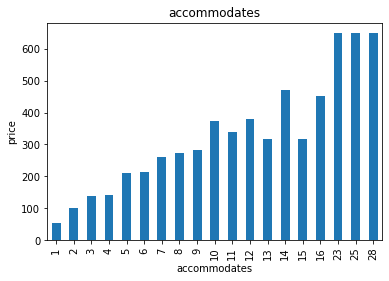

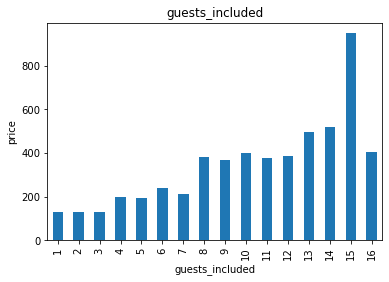

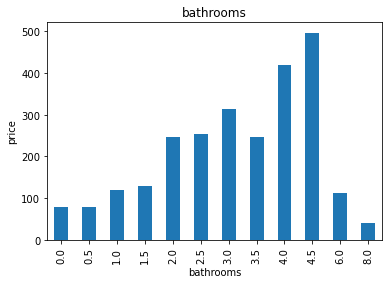

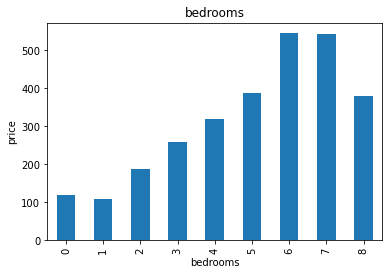

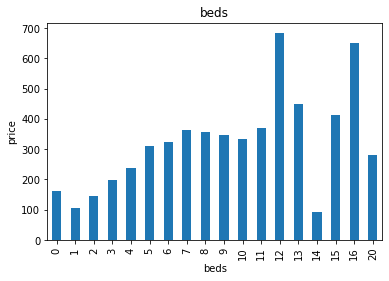

In [827]:
# Now lets see the reationship between discrete variables and the price in the testing dataset

# Lets Find the realtionship between them and  mean Sale PRice

for feature in discrete_features_train:
    data=df_train.copy()
    data.groupby(feature)['price'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [828]:
# from the above plots we can say that the each  value in the discrete feature has impact on  mean price
# example as no of bedrooms and accomodates increases the mean price also increases
# the mean price increases for no of guests till 15 , after that it decreases
# if the no of beds are 12 and 16 the mean sale price is high, where as for others it decreases
# the mean sale price is high for bathrooms 4.5

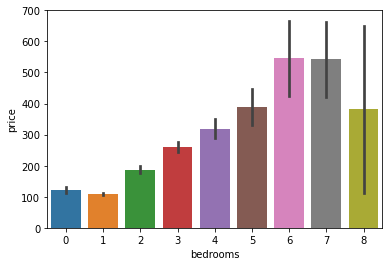

In [829]:
# now we will analyse individually

# for bedrooms feature in training dataset

plt.figure()
sns.barplot(x=df_train['bedrooms'], y=df_train['price'])

In [830]:
bedroom = df_train.groupby(['bedrooms']).price.agg([len, min, max])
bedroom

,len,min,max
bedrooms,,,
0,448.0,35.0,999.0
1,1931.0,0.0,999.0
2,657.0,10.0,999.0
3,276.0,20.0,999.0
4,99.0,77.0,900.0
5,34.0,100.0,750.0
6,9.0,287.0,950.0
7,10.0,250.0,899.0
8,2.0,112.0,650.0


In [831]:
# the max price of 7,8 bedrooms are less than max price of 6 bedroom
# and there are only 12 observations where the bedroom is greater than 6
# so we will consider the property with > 6 bedrooms as 6 bedrooms
# even our test data has max of 6 bedrooms

df_train['bedrooms'] = np.where((df_train.bedrooms >6 ), 6, df_train.bedrooms) 

In [832]:
df_test['bedrooms'].unique()

array([2, 1, 3, 0, 6, 4, 5], dtype=int64)

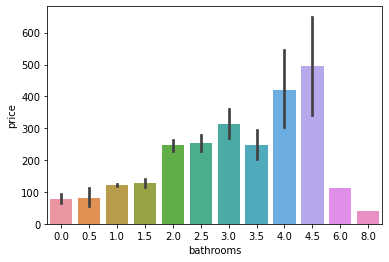

In [833]:
# For bathroom feature

plt.figure()
sns.barplot(x=df_train['bathrooms'], y=df_train['price'])

In [834]:
bathrooms = df_train.groupby(['bathrooms']).price.agg([len, min, max])
bathrooms

,len,min,max
bathrooms,,,
0.0,4.0,59.0,99.0
0.5,10.0,40.0,168.0
1.0,2590.0,0.0,999.0
1.5,161.0,23.0,494.0
2.0,395.0,10.0,999.0
2.5,120.0,41.0,891.0
3.0,76.0,20.0,950.0
3.5,85.0,25.0,900.0
4.0,18.0,27.0,899.0


In [835]:
# the max price for bathrooms 4.5,6,8 are less than and max price of 4 bathrooms
# and there are only 5 observations where the bathroom is greater than 4
# so we will consider the property with > 4 bathrooms as 4 bathrooms
# even our test data has max of 4  bedrooms

In [836]:
df_test['bathrooms'].unique()

array([1. , 2.5, 1.5, 2. , 3. , 3.5, 4. , 0. , 0.5])

In [837]:
df_train['bathrooms'] = np.where((df_train.bathrooms >4 ), 4, df_train.bathrooms) 

In [838]:
# Continuous feature

continuous_features_train=[feature for feature in numerical_features_train if feature not in discrete_features_train]
continuous_features_test=[feature for feature in numerical_features_test if feature not in discrete_features_test]

print('The No Of Continuous Features In Training Dataset:',len(continuous_features_train),'And They Are',continuous_features_train)
print('The No Of Continuous Features In Testing Dataset:',len(continuous_features_test),'And They Are',continuous_features_test)

The No Of Continuous Features In Training Dataset: 7 And They Are ['host_response_rate', 'host_listings_count', 'latitude', 'longitude', 'cleaning_fee', 'minimum_nights', 'maximum_nights']
The No Of Continuous Features In Testing Dataset: 7 And They Are ['host_response_rate', 'host_listings_count', 'latitude', 'longitude', 'cleaning_fee', 'minimum_nights', 'maximum_nights']


In [839]:
# latitude and longitude data is not making any sense to the price column
# so remove it

df_train.drop(['latitude', 'longitude'],axis=1,inplace=True)
df_test.drop(['latitude', 'longitude'],axis=1,inplace=True)

In [840]:
numerical_features_train=[feature for feature in df_train.columns if df_train[feature].dtypes != 'O' and df_train[feature].dtypes != 'bool' and feature!='price'  ]
numerical_features_test=[feature for feature in df_test.columns if df_train[feature].dtypes != 'O' and df_train[feature].dtypes != 'bool']

In [841]:
continuous_features_train=[feature for feature in numerical_features_train if feature not in discrete_features_train]
continuous_features_test=[feature for feature in numerical_features_test if feature not in discrete_features_test]

print('The No Of Continuous Features In Training Dataset:',len(continuous_features_train),'And They Are',continuous_features_train)
print('The No Of Continuous Features In Testing Dataset:',len(continuous_features_test),'And They Are',continuous_features_test)

The No Of Continuous Features In Training Dataset: 5 And They Are ['host_response_rate', 'host_listings_count', 'cleaning_fee', 'minimum_nights', 'maximum_nights']
The No Of Continuous Features In Testing Dataset: 5 And They Are ['host_response_rate', 'host_listings_count', 'cleaning_fee', 'minimum_nights', 'maximum_nights']


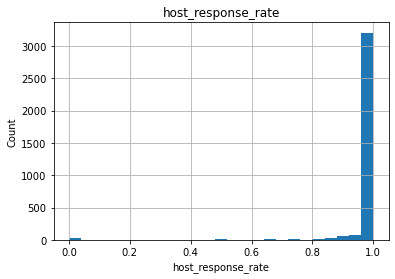

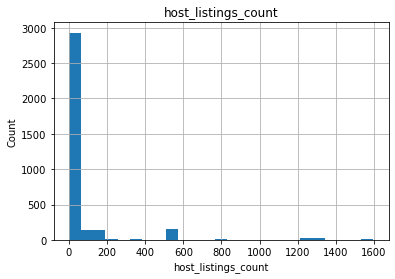

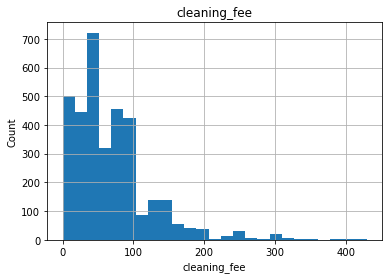

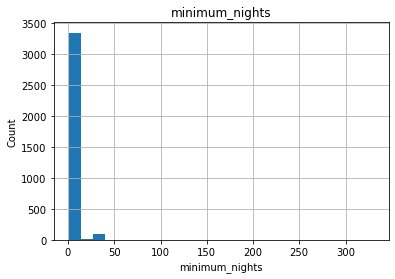

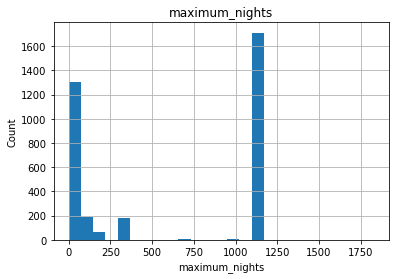

In [842]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_features_train:
    data=df_train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [843]:
# we can see that the continuous features are having skewed data is skewed 

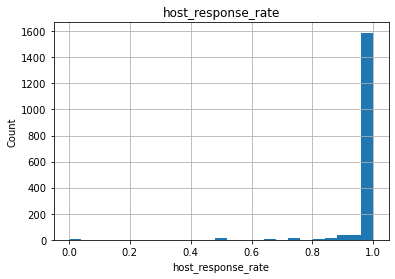

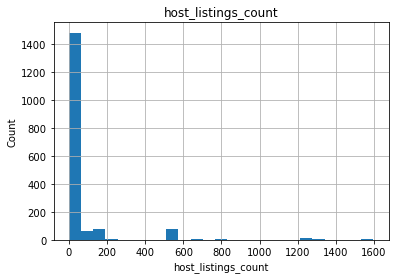

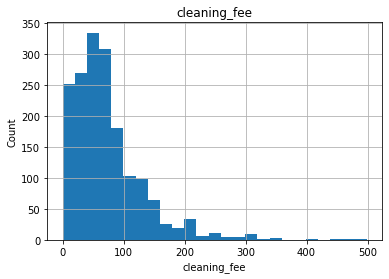

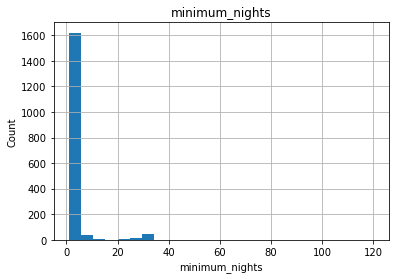

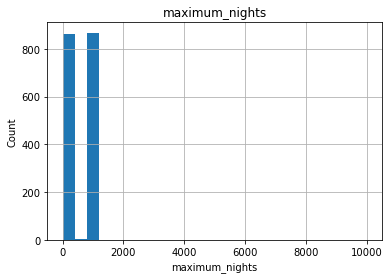

In [844]:
# continuous features of test data

for feature in continuous_features_test:
    data=df_test.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [845]:
# continuous features in test data is also skewed

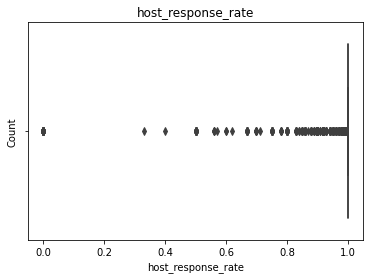

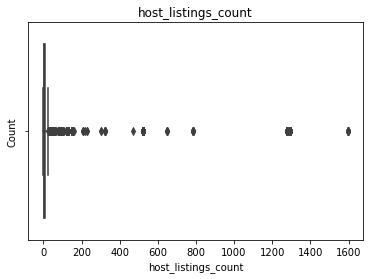

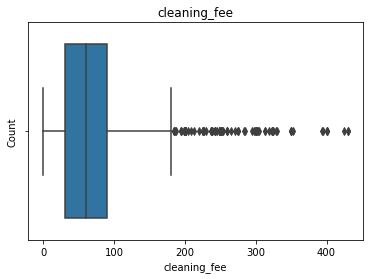

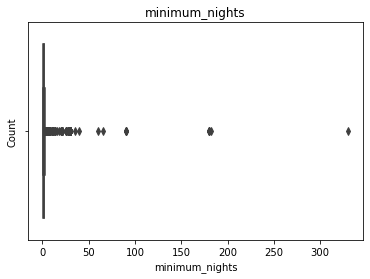

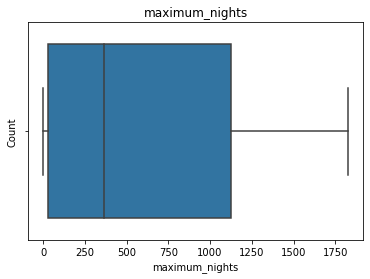

In [846]:
# outliers in continuous features (train data)

for feature in continuous_features_train:
    data=df_train.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

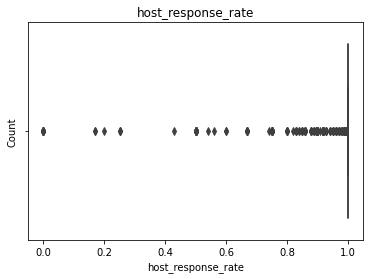

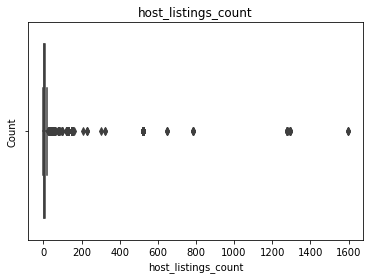

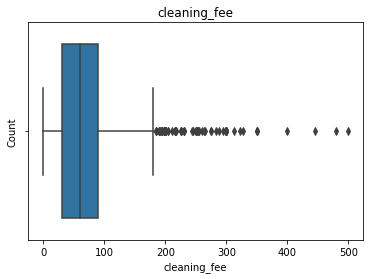

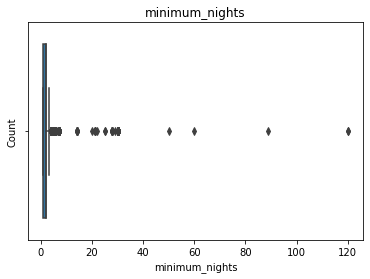

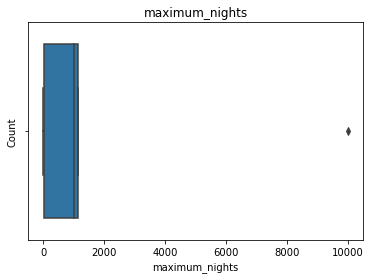

In [847]:
# outliers in continuous features (test data)

for feature in continuous_features_test:
    data=df_test.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [848]:
# Boolean features

boolean_train=[feature for feature in df_train.columns if df_train[feature].dtypes == 'bool' ]
boolean_test=[feature for feature in df_test.columns if df_test[feature].dtypes == 'bool' ]

print('The No Of Boolean Features in Training Dataset is:',len(boolean_train),'And They Are',boolean_train)
print('The No Of Boolean Features in Testing Dataset is:',len(boolean_test),'And They Are',boolean_test)

The No Of Boolean Features in Training Dataset is: 3 And They Are ['host_is_superhost', 'host_identity_verified', 'instant_bookable']
The No Of Boolean Features in Testing Dataset is: 3 And They Are ['host_is_superhost', 'host_identity_verified', 'instant_bookable']


In [849]:
df_train[boolean_train]

,host_is_superhost,host_identity_verified,instant_bookable
0,False,False,True
1,True,True,True
2,True,False,False
3,True,True,False
4,True,True,False
...,...,...,...
3461,False,False,True
3462,False,False,True
3463,True,False,True
3464,True,False,False


In [850]:
df_test[boolean_test]

,host_is_superhost,host_identity_verified,instant_bookable
0,False,True,True
1,True,False,True
2,True,True,False
3,True,True,False
4,False,False,False
...,...,...,...
1729,False,True,False
1730,True,True,True
1731,True,True,False
1732,False,False,True


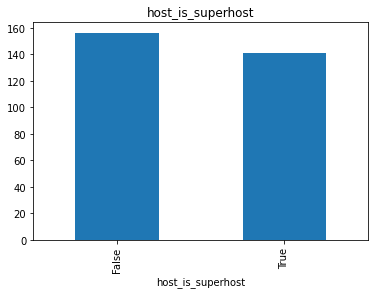

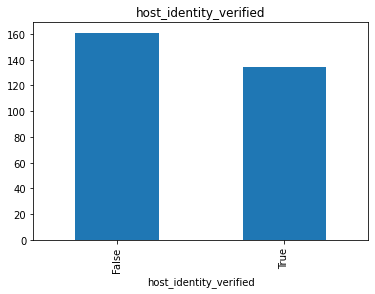

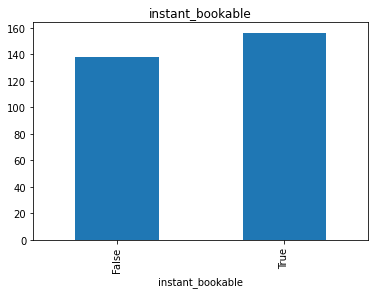

In [851]:
# visualization of boolean features

for feature in boolean_train:
    df_train.groupby(feature)['price'].mean().plot.bar()
    plt.title(feature)
    plt.show()

In [852]:
# we will do binary encoding for this 

for feature in boolean_train:
    df_train[feature]=df_train[feature].astype(str).map({'True':1,'False':0})
    
for feature in boolean_test:
    df_test[feature]=df_test[feature].astype(str).map({'True':1,'False':0})

In [853]:
df_train[boolean_train]

,host_is_superhost,host_identity_verified,instant_bookable
0,0,0,1
1,1,1,1
2,1,0,0
3,1,1,0
4,1,1,0
...,...,...,...
3461,0,0,1
3462,0,0,1
3463,1,0,1
3464,1,0,0


In [854]:
df_test[boolean_test]

,host_is_superhost,host_identity_verified,instant_bookable
0,0,1,1
1,1,0,1
2,1,1,0
3,1,1,0
4,0,0,0
...,...,...,...
1729,0,1,0
1730,1,1,1
1731,1,1,0
1732,0,0,1


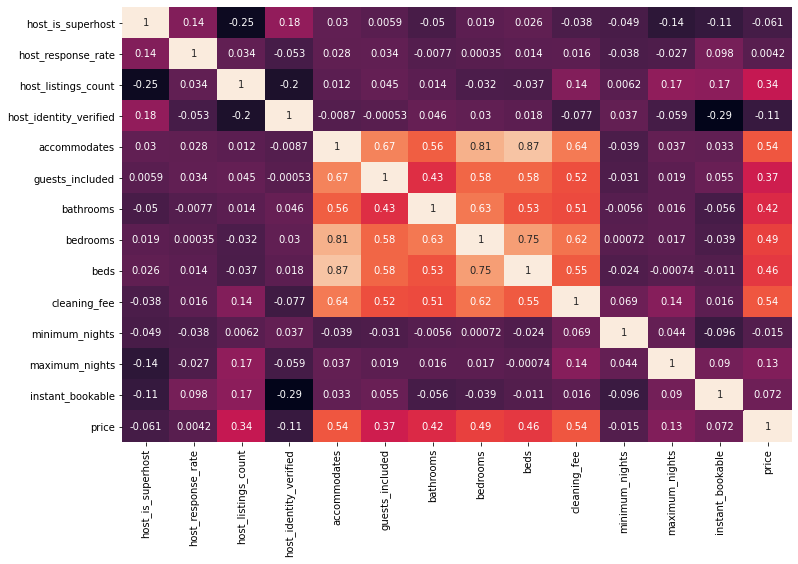

In [855]:
# Correlation in trianing dataset

plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(),annot=True,cbar=False)

In [856]:
# accommodates and beds are highly corrrelated so remove one
# similarly accommodates and bedrooms higly correlated

# correlation does not cause causation

In [857]:
numerical_features_train=[feature for feature in df_train.columns if df_train[feature].dtypes != 'O' and df_train[feature].dtypes != 'bool' and feature!='price'  ]
numerical_features_test=[feature for feature in df_test.columns if df_train[feature].dtypes != 'O' and df_train[feature].dtypes != 'bool']

print(len(numerical_features_train))
print(len(numerical_features_test))

13
13


# Feature Scaling

In [858]:

df_train[numerical_features_train] = (df_train[numerical_features_train] - df_train[numerical_features_train].mean()) / df_train[numerical_features_train].std()
df_test[numerical_features_test] = (df_test[numerical_features_test] - df_test[numerical_features_test].mean()) / df_test[numerical_features_test].std()

# Categorical Features 

In [859]:
cat_features_train=[feature for feature in df_train.columns if feature!='amenities' and df_train[feature].dtype == 'O'  ]
cat_features_test=[feature for feature in df_test.columns if df_test[feature].dtype == 'O' and feature!='amenities']

In [860]:
cat_features_train

['host_response_time',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

In [861]:
cat_features_test

['host_response_time',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

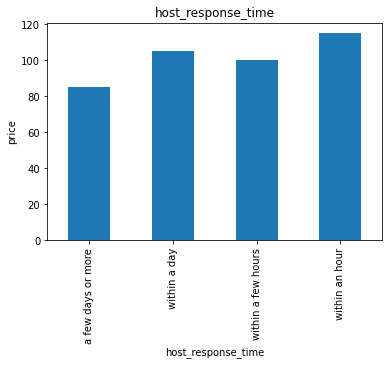

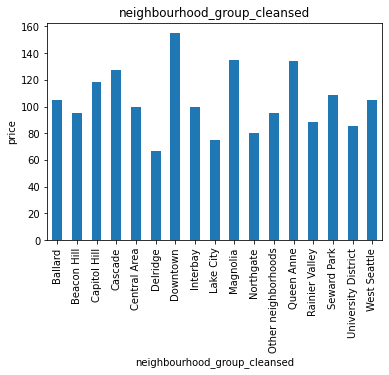

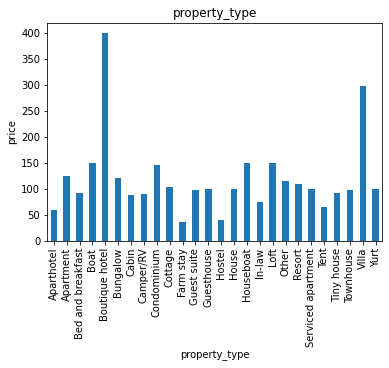

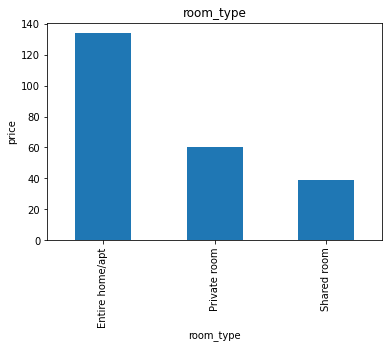

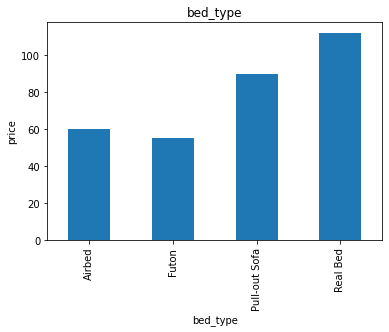

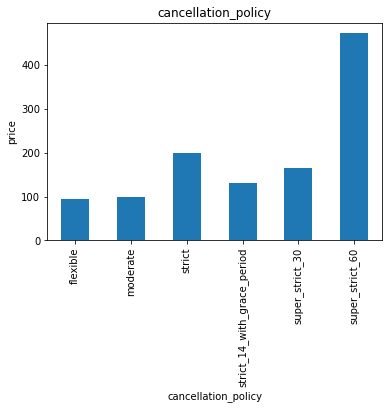

In [862]:
for feature in cat_features_train:
    data=df_train.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [863]:
for feature in cat_features_train:
    print(feature,':',df_train[feature].nunique())

host_response_time : 4
neighbourhood_group_cleansed : 17
property_type : 26
room_type : 3
bed_type : 4
cancellation_policy : 6


In [864]:
for feature in cat_features_test:
    print(feature,':',df_test[feature].nunique())

host_response_time : 4
neighbourhood_group_cleansed : 17
property_type : 21
room_type : 3
bed_type : 5
cancellation_policy : 6


In [865]:
df_train['bed_type'].value_counts()

Real Bed         3421
Futon              23
Pull-out Sofa      16
Airbed              6
Name: bed_type, dtype: int64

In [866]:
df_test['bed_type'].value_counts()

Real Bed         1713
Futon              11
Airbed              5
Pull-out Sofa       4
Couch               1
Name: bed_type, dtype: int64

In [867]:
# only one couch is in bed type of test data, change it to real bed in test data

df_test['bed_type']= np.where((df_test.bed_type == 'Couch' ), 'Real Bed', df_test.bed_type) 

In [868]:
df_test['bed_type'].value_counts()

Real Bed         1714
Futon              11
Airbed              5
Pull-out Sofa       4
Name: bed_type, dtype: int64

In [869]:
df_train['property_type'].unique()

array(['Apartment', 'House', 'Guest suite', 'Townhouse', 'Bungalow',
       'Condominium', 'Loft', 'Serviced apartment', 'Guesthouse',
       'Houseboat', 'Aparthotel', 'Bed and breakfast', 'Camper/RV',
       'Tiny house', 'Cabin', 'Boat', 'Cottage', 'Other', 'Farm stay',
       'Hostel', 'Tent', 'Resort', 'Yurt', 'In-law', 'Boutique hotel',
       'Villa'], dtype=object)

In [870]:
df_train['property_type'].value_counts()

Apartment             1158
House                 1079
Guest suite            343
Townhouse              292
Condominium            193
Guesthouse             105
Serviced apartment      89
Loft                    48
Bungalow                40
Aparthotel              26
Cottage                 18
Cabin                   12
Tiny house              12
Boat                     9
Camper/RV                9
Houseboat                7
Other                    7
Bed and breakfast        6
Hostel                   4
Tent                     3
Resort                   1
Farm stay                1
Villa                    1
Yurt                     1
In-law                   1
Boutique hotel           1
Name: property_type, dtype: int64

In [871]:
df_train.shape

(3466, 21)

In [872]:
# dummy encoding for categorical features other than amenities feature in testing dataset

df_train=pd.get_dummies(df_train,columns=cat_features_train)

In [873]:
df_train.shape

(3466, 75)

In [874]:
df_test.shape

(1734, 20)

In [875]:
# dummy encoding for categorical features other than amenities feature in training dataset

df_test=pd.get_dummies(df_test,columns=cat_features_test)

In [876]:
df_test.shape

(1734, 69)

## Feature Engineering

### Handling Amenities column 

In [877]:
# Amenities column for training data set

df_train['amenities'][0]

'{TV,Internet,Wifi,Kitchen,Elevator,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Self check-in","Smart lock",Keypad,"Private living room"}'

In [878]:
# in each rom all the extra features are removed and then the amenities are stored as list in each row


def striplist(l):
    return([x.strip() for x in l])


df_train['amenities'] = df_train['amenities'].str.replace('{', '') \
                                         .str.replace('}', '') \
                                         .str.replace('"','') \
                                         .str.lower() \
                                         .str.split(',') \
                                         .apply(striplist)

In [879]:
df_train['amenities'] # it resembles multi label

0       [tv, internet, wifi, kitchen, elevator, heatin...
1       [tv, cable tv, internet, wifi, air conditionin...
2       [tv, wifi, air conditioning, kitchen, free str...
3       [internet, wifi, kitchen, pets live on this pr...
4       [tv, wifi, kitchen, free parking on premises, ...
                              ...                        
3461    [tv, internet, wifi, air conditioning, kitchen...
3462    [wifi, kitchen, heating, essentials, shampoo, ...
3463    [wifi, kitchen, free parking on premises, pets...
3464    [tv, wifi, free parking on premises, indoor fi...
3465    [wifi, kitchen, free street parking, heating, ...
Name: amenities, Length: 3466, dtype: object

In [880]:
# method 1

#Finding length of each list and creating new feature 

def number_counter(val):
    return len(val)

df_train['no_of_amenities'] = df_train['amenities'].apply(lambda x: number_counter(x))
df_test['no_of_amenities'] = df_test['amenities'].apply(lambda x: number_counter(x))


In [881]:
df_train['no_of_amenities'].head(5)

0    24
1    39
2    32
3    17
4    30
Name: no_of_amenities, dtype: int64

In [882]:
df_train1 = df_train.copy()

In [883]:
df_train.drop(['amenities'],axis=1,inplace=True)

In [884]:
# using multilabelbinarizer encode the amenities column

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Use the MultiLabelBinarizer to fit and transform amenities
amenities_matrix = mlb.fit_transform(df_train1['amenities'])

# Store this result in a DataFrame called amenities_df (similar to what we did above with host_verif_df)
amenities_df = pd.DataFrame(amenities_matrix, columns = mlb.classes_)

# check the output after using the transformer
amenities_df.head(2)

,,24-hour check-in,accessible-height bed,accessible-height toilet,air conditioning,amazon echo,baby bath,baby monitor,babysitter recommendations,balcony,bath towel,bathroom essentials,bathtub,bathtub with bath chair,bbq grill,beach essentials,beach view,beachfront,bed linens,bedroom comforts,body soap,breakfast,breakfast table,building staff,buzzer/wireless intercom,cable tv,carbon monoxide detector,cat(s),ceiling fan,central air conditioning,changing table,children’s books and toys,children’s dinnerware,cleaning before checkout,coffee maker,convection oven,cooking basics,crib,day bed,disabled parking spot,dishes and silverware,dishwasher,dog(s),doorman,dryer,dvd player,electric profiling bed,elevator,en suite bathroom,espresso machine,essentials,ethernet connection,ev charger,exercise equipment,extra pillows and blankets,family/kid friendly,fire extinguisher,fire pit,fireplace guards,firm mattress,first aid kit,fixed grab bars for shower,fixed grab bars for toilet,flat path to front door,formal dining area,free parking on premises,free street parking,full kitchen,game console,garden or backyard,gas oven,ground floor access,gym,hair dryer,hammock,handheld shower head,hangers,hbo go,heat lamps,heated floors,heated towel rack,heating,high chair,high-resolution computer monitor,host greets you,hot tub,hot water,hot water kettle,indoor fireplace,internet,iron,jetted tub,keypad,kitchen,kitchenette,lake access,laptop friendly workspace,lock on bedroom door,lockbox,long term stays allowed,luggage dropoff allowed,memory foam mattress,microwave,mini fridge,mountain view,mudroom,netflix,other,other pet(s),outdoor parking,outdoor seating,outlet covers,oven,pack ’n play/travel crib,paid parking off premises,paid parking on premises,patio or balcony,pets allowed,pets live on this property,pillow-top mattress,pocket wifi,pool,pool with pool hoist,printer,private bathroom,private entrance,private hot tub,private living room,projector and screen,rain shower,refrigerator,roll-in shower,room-darkening shades,safety card,sauna,self check-in,shampoo,shared gym,shared hot tub,shared pool,shower chair,single level home,ski-in/ski-out,smart lock,smart tv,smoke detector,smoking allowed,soaking tub,sound system,stair gates,stand alone steam shower,standing valet,steam oven,step-free access,stove,suitable for events,sun loungers,table corner guards,terrace,toilet,toilet paper,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,tv,walk-in shower,warming drawer,washer,waterfront,well-lit path to entrance,wheelchair accessible,wide clearance to bed,wide clearance to shower,wide doorway,wide entryway,wide hallway clearance,wifi,window guards,wine cooler
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Take out the first column, which is like another index
This probably occured when an empty strings in either amenities or host_verification was transformed. As such, this extra index column can be dropped.

In [885]:
# Drop the blank named column
amenities_df = amenities_df.drop([''], axis=1)

In [886]:
# Drop the  amenities feature from df_train
df_train1.drop(['amenities'], axis=1,inplace=True)

# Concatenate amenities_df  to the original df_train DataFrame
df_train1 = pd.concat([df_train1, amenities_df], axis=1)


In [887]:
df_train1.shape

(3466, 252)

In [888]:
df_test['amenities']

0       {TV,Internet,Wifi,Kitchen,"Free street parking...
1       {TV,Wifi,"Free parking on premises","Pets allo...
2       {Wifi,Kitchen,"Free parking on premises",Heati...
3       {TV,Wifi,"Air conditioning",Kitchen,"Paid park...
4       {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
                              ...                        
1729    {TV,Wifi,Kitchen,"Free parking on premises","P...
1730    {TV,"Cable TV",Internet,Wifi,"Wheelchair acces...
1731    {TV,Internet,Wifi,"Pets live on this property"...
1732    {Wifi,Kitchen,"Free parking on premises","Free...
1733    {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...
Name: amenities, Length: 1734, dtype: object

In [889]:
# Amenities column for training data 

def striplist(l):
    return([x.strip() for x in l])


df_test['amenities'] = df_test['amenities'].str.replace('{', '') \
                                         .str.replace('}', '') \
                                         .str.replace('"','') \
                                         .str.lower() \
                                         .str.split(',') \
                                         .apply(striplist)

In [890]:
df_test['amenities']

0       [tv, internet, wifi, kitchen, free street park...
1       [tv, wifi, free parking on premises, pets allo...
2       [wifi, kitchen, free parking on premises, heat...
3       [tv, wifi, air conditioning, kitchen, paid par...
4       [tv, internet, wifi, air conditioning, kitchen...
                              ...                        
1729    [tv, wifi, kitchen, free parking on premises, ...
1730    [tv, cable tv, internet, wifi, wheelchair acce...
1731    [tv, internet, wifi, pets live on this propert...
1732    [wifi, kitchen, free parking on premises, free...
1733    [tv, cable tv, wifi, air conditioning, kitchen...
Name: amenities, Length: 1734, dtype: object

In [891]:

#Finding length of each list and creating new feature 

def number_counter(val):
    return len(val)

df_test['no_of_amenities'] = df_test['amenities'].apply(lambda x: number_counter(x))

In [892]:
df_test['no_of_amenities'].head(5)

0    24
1    27
2    24
3    34
4    22
Name: no_of_amenities, dtype: int64

In [893]:
df_test1 = df_test.copy()

In [894]:
df_test.drop(['amenities'],axis=1,inplace=True)

In [895]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Use the MultiLabelBinarizer to fit and transform amenities
amenities_matrix = mlb.fit_transform(df_test1['amenities'])

# Store this result in a DataFrame called amenities_df (similar to what we did above with host_verif_df)
amenities_df = pd.DataFrame(amenities_matrix, columns = mlb.classes_)#from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Use the MultiLabelBinarizer to fit and transform amenities
amenities_matrix = mlb.fit_transform(df_test1['amenities'])

# Store this result in a DataFrame called amenities_df (similar to what we did above with host_verif_df)
amenities_df = pd.DataFrame(amenities_matrix, columns = mlb.classes_)

In [896]:
# check the output after using the transformer
amenities_df.head(2)

,24-hour check-in,accessible-height bed,accessible-height toilet,air conditioning,alfresco bathtub,amazon echo,baby bath,baby monitor,babysitter recommendations,balcony,bath towel,bathroom essentials,bathtub,bathtub with bath chair,bbq grill,beach essentials,beachfront,bed linens,bedroom comforts,body soap,breakfast,breakfast table,building staff,buzzer/wireless intercom,cable tv,carbon monoxide detector,cat(s),ceiling fan,changing table,children’s books and toys,children’s dinnerware,cleaning before checkout,coffee maker,convection oven,cooking basics,crib,day bed,disabled parking spot,dishes and silverware,dishwasher,dog(s),doorman,dryer,dvd player,electric profiling bed,elevator,en suite bathroom,espresso machine,essentials,ethernet connection,ev charger,exercise equipment,extra pillows and blankets,family/kid friendly,fire extinguisher,fire pit,fireplace guards,firm mattress,first aid kit,fixed grab bars for shower,fixed grab bars for toilet,flat path to front door,formal dining area,free parking on premises,free street parking,full kitchen,game console,garden or backyard,gas oven,ground floor access,gym,hair dryer,hammock,handheld shower head,hangers,hbo go,heat lamps,heated floors,heated towel rack,heating,high chair,high-resolution computer monitor,host greets you,hot tub,hot water,hot water kettle,indoor fireplace,internet,iron,jetted tub,keypad,kitchen,kitchenette,lake access,laptop friendly workspace,lock on bedroom door,lockbox,long term stays allowed,luggage dropoff allowed,memory foam mattress,microwave,mini fridge,mountain view,mudroom,murphy bed,netflix,other,other pet(s),outdoor parking,outdoor seating,outlet covers,oven,pack ’n play/travel crib,paid parking off premises,paid parking on premises,patio or balcony,pets allowed,pets live on this property,pillow-top mattress,pocket wifi,pool,private bathroom,private entrance,private gym,private living room,rain shower,refrigerator,roll-in shower,room-darkening shades,safety card,sauna,self check-in,shampoo,shared gym,shared hot tub,shared pool,shower chair,single level home,ski-in/ski-out,smart lock,smart tv,smoke detector,smoking allowed,soaking tub,sound system,stair gates,step-free access,stove,suitable for events,sun loungers,table corner guards,tennis court,terrace,toilet,toilet paper,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,tv,walk-in shower,warming drawer,washer,waterfront,well-lit path to entrance,wheelchair accessible,wide clearance to bed,wide clearance to shower,wide doorway,wide entryway,wide hallway clearance,wifi,window guards
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [897]:
# Drop the  amenities feature from df_train
df_test1.drop(['amenities'], axis=1,inplace=True)

# Concatenate amenities_df  to the original df_train DataFrame
df_test1 = pd.concat([df_test1, amenities_df], axis=1)


In [898]:
df_test1.shape

(1734, 240)

In [899]:
# label binarizer has created unnecessary no of columns
# so we will follow the method 1

# Analysis of target feature

In [900]:
df_train['price'].describe()

count    3466.000000
mean      148.706001
std       128.111704
min         0.000000
25%        79.000000
50%       112.000000
75%       175.000000
max       999.000000
Name: price, dtype: float64

In [901]:
df_train['price'].skew()

3.4409284865092866

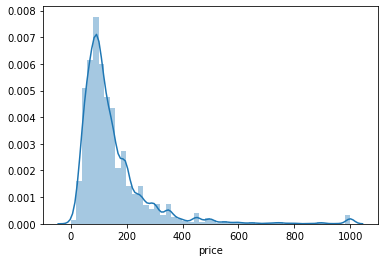

In [902]:
sns.distplot(df_train['price'])

In [903]:
# use log transformation

df_train['price']=np.log(df_train['price']+1)

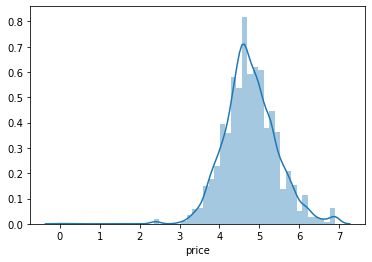

In [904]:
sns.distplot(df_train['price'])

In [905]:
df_train['price'].skew()

0.193868997322154

In [906]:
# thus skewness has been treated

# Modelling

In [912]:
# with amenities column

x=df_train.drop(['price'],axis=1)
y=df_train['price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
model=regressor.fit(x_train,y_train)
model

model.score(x_train, y_train)*100

62.34794136335287

In [913]:
# the score has improved to some extent
# will also check the OLS study

import statsmodels.api as sm
x_train_sm = x_train
x_train_sm = sm.add_constant(x_train_sm)
model_0 = sm.OLS(y_train,x_train_sm).fit()


print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     59.19
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:46:54   Log-Likelihood:                -1268.3
No. Observations:                2426   AIC:                             2671.
Df Residuals:                    2359   BIC:                             3059.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [914]:
from sklearn import metrics

y_pred = model.predict(x_train)

print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 0.29024248167465605
MSE: 0.1665810105360077
RMSE: 0.4081433700747909


## Random Forest

In [922]:
#Declearing the Random Forest Model
RFModel = RandomForestRegressor(n_estimators=1000,max_depth=11, max_features='auto')

#Fitting values in RFModel
RFModel.fit(x_train, y_train)

RandomForestRegressor(max_depth=11, n_estimators=1000)

In [927]:
## Accuracy with Random Forest

# Prediction with training dataset:
y_pred = RFModel.predict(x_train)


# Find training accuracy for this model:
accuracy_RF = r2_score(y_train, y_pred)
print('Accuracy:',accuracy_RF*100)

# Find RMSE for training data:
RMSE= sqrt(mean_squared_error(y_train, y_pred))
print('RMSE:',RMSE)

Accuracy: 87.71743513776357
RMSE: 0.23311107981581225


In [ ]:
# With random forest the accuracy has improved a lot

# Feature Selection

In [928]:

threshold = 0.8

# Calculating an absolute value correlation matrix
corr_mat = x_train.corr().abs()

# Getting upper triangle of this matrix only
upper = pd.DataFrame(np.triu(corr_mat, k=1), columns=x_train.columns)

# Select columns with correlations above threshold
corr_col_drop = [col for col in upper.columns if any(upper[col] > threshold)]

print(f'There are {len(corr_col_drop)} columns to remove out of {len(x_train.columns)}.')

There are 5 columns to remove out of 74.


In [929]:
x_train_new = x_train.drop(corr_col_drop, axis=1)
x_test_new = x_test.drop(corr_col_drop, axis=1)

In [930]:
RFModel2 = RandomForestRegressor(n_estimators=1000,max_depth=11, max_features='auto')

#Fitting values in RFModel
RFModel2.fit(x_train, y_train)

RandomForestRegressor(max_depth=11, n_estimators=1000)

In [931]:
## Accuracy with Random Forest model 2

# Prediction with training dataset:
y_pred = RFModel2.predict(x_train)


# Find training accuracy for this model:
accuracy_RF = r2_score(y_train, y_pred)
print('Accuracy:',accuracy_RF*100)

# Find RMSE for training data:
RMSE= sqrt(mean_squared_error(y_train, y_pred))
print('RMSE:',RMSE)

Accuracy: 87.72737800281367
RMSE: 0.233016707781409


## RandomForest showed better result